# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [2]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat
#!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat  
#!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

--2022-02-07 18:34:39--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-02-07 18:34:39 (282 MB/s) - ‘test.dat’ saved [2844/2844]

--2022-02-07 18:34:39--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-02-07 18:34:40 (133 MB/s) - ‘train.dat’ saved [11244/11244]



In [3]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [4]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [[-1] + instance]
        data += instance
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum([array1[i]*array2[i] for i in range(len(array1))])

def sigmoid(x):
    #TODO: Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0 
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # initialize weights to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # calculate summed value for each input and associated weight
            in_value = dot_product(weights, instance)

            # pass summed weighted input value to sigmoid function:
            output = sigmoid(in_value)

            # calculate the error (expected - predicted)
            error = instance[-1] - output
            
            #TODO: name these steps
            # update weights based on gradient of error and learning rate
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)

accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




The predict(weights, instance) function only returns the predicted class of 0 or 1 based on the weights and instance values supplied to it. Using the output of sigmoid(dot_product(weights, instance)) functions allows us to calculate the gradient of the error (loss), which we can then use to adjust the weights so as to minimize the error.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [11]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

track_acc005 = []
track_acc01 = []
track_acc05 = []

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      if lr == 0.005:
        track_acc005 += [accuracy]
      elif lr == 0.01:
        track_acc01 += [accuracy]
      else:
        track_acc05 += [accuracy]
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



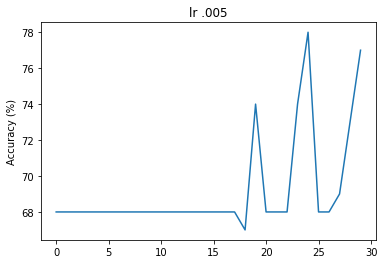

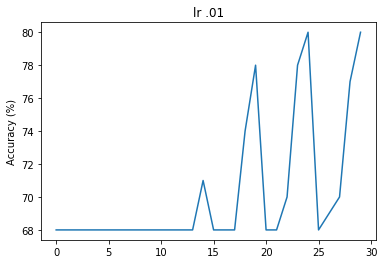

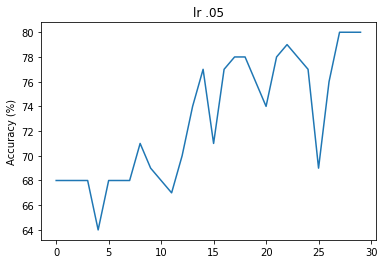

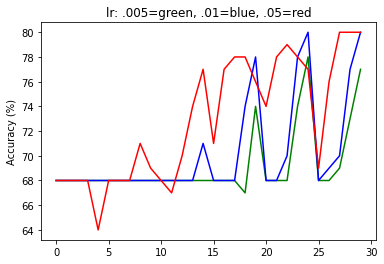

#tr: 400, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 800, learning rate: 0.001; Accuracy (test, 100 instances): 80.0


In [31]:
import matplotlib.pyplot as plt

# plot accuracy for each set of hyperparameters, separated by learning rate
plt.plot(track_acc005)
plt.title('lr .005')
plt.ylabel('Accuracy (%)')
plt.show()
plt.plot(track_acc01)
plt.title('lr .01')
plt.ylabel('Accuracy (%)')
plt.show()
plt.plot(track_acc05)
plt.title('lr .05')
plt.ylabel('Accuracy (%)')
plt.show()
# plot accuracy for all 3 learning rates together
plt.plot(track_acc005, 'g', track_acc01, 'b', track_acc05, 'r')
plt.title('lr: .005=green, .01=blue, .05=red')
plt.ylabel('Accuracy (%)')
plt.show()

# attempting to improve accuracy above 80%
# training with lr=0.005, 100% training data, 200 epochs
weights = train_perceptron(instances_tr, 0.005, 200)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):0}, epochs: {200:3}, learning rate: {0.005:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
# training with lr=0.001, 100% training data, 800 epochs
weights = train_perceptron(instances_tr, 0.001, 800)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):0}, epochs: {800:3}, learning rate: {0.001:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

The accuracy across different combinations of hyperparameters, separated by learning rate, can be seen in the plots above. Looking at the bottom plot, we can see that using a learning rate of 0.01 achieved maximum accuracy sooner than the others. This occurred using 75% of the training data and 100 epochs, demonstrating that 100% of the training data is not required to reach maximum accuracy (Q3 part A). <br>Looking at the accuracy plot with a learning rate of 0.05, we see that maximum accuracy was achieved and maintained during the final rounds of training/testing. This occurred with 100% of the training data and 20, 50, and 100 epochs, demonstrating that increasing epochs does not always yield improvements to accuracy (Q3 part D above). This plot also shows how increasing learning rate can improve accuracy for fewer epochs and smaller training sets (Q3 part B above).
<br><br>From the testing done above, it appears 80% accuracy is the highest achievable for this dataset with the given set of hyperparameters (and not surprising when considering the data is binary and linearly separable, Q3 part C). However, more testing could be done to improve efficiency of training using random sampling of the training data (rather than just taking the first X%) combined with decreasing the learning rate as accuracy increases.
<br>
 